Epoch 1, Train Loss: 1.088, Test Loss: 0.910
Epoch 2, Train Loss: 0.884, Test Loss: 0.875
Epoch 3, Train Loss: 0.829, Test Loss: 0.843
Epoch 4, Train Loss: 0.791, Test Loss: 0.822
Epoch 5, Train Loss: 0.754, Test Loss: 0.791
Epoch 6, Train Loss: 0.724, Test Loss: 0.765
Epoch 7, Train Loss: 0.698, Test Loss: 0.745
Epoch 8, Train Loss: 0.669, Test Loss: 0.719
Epoch 9, Train Loss: 0.639, Test Loss: 0.698
Epoch 10, Train Loss: 0.616, Test Loss: 0.681
Epoch 11, Train Loss: 0.603, Test Loss: 0.666
Epoch 12, Train Loss: 0.577, Test Loss: 0.654
Epoch 13, Train Loss: 0.559, Test Loss: 0.645
Epoch 14, Train Loss: 0.555, Test Loss: 0.629
Epoch 15, Train Loss: 0.540, Test Loss: 0.622
Epoch 16, Train Loss: 0.537, Test Loss: 0.609
Epoch 17, Train Loss: 0.518, Test Loss: 0.600
Epoch 18, Train Loss: 0.510, Test Loss: 0.593
Epoch 19, Train Loss: 0.496, Test Loss: 0.584
Epoch 20, Train Loss: 0.486, Test Loss: 0.576
Epoch 21, Train Loss: 0.492, Test Loss: 0.568
Epoch 22, Train Loss: 0.475, Test Loss: 0.5

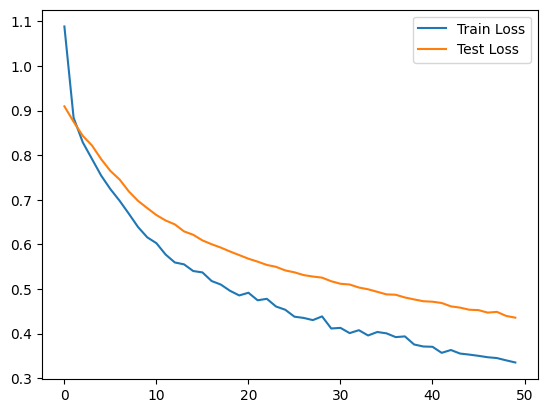

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregar Dataset
iris = load_iris()

# Divide os dados em conjuntos de treinamento e validação
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Define a classe para o conjunto de dados e DataLoader
class IrisDataset(torch.utils.data.Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.tensor(self.data[index], dtype=torch.float32)
        y = torch.tensor(self.targets[index], dtype=torch.long)
        return x, y

    def __len__(self):
        return len(self.data)

train_dataset = IrisDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define a arquitetura da Rede Neural
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

# Define o critério de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Treinar Rede Neural
train_loss = []
test_loss = []

for epoch in range(50):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate Train Loss
    train_loss.append(running_loss / len(train_dataloader))

    # Calculate Test Loss
    with torch.no_grad():
        test_inputs = torch.tensor(X_test, dtype=torch.float32)
        test_labels = torch.tensor(y_test, dtype=torch.long)
        test_outputs = net(test_inputs)
        test_loss.append(criterion(test_outputs, test_labels).item())

    print(f"Epoch {epoch+1}, Train Loss: {train_loss[-1]:.3f}, Test Loss: {test_loss[-1]:.3f}")

# Plotar gráfico
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.legend()
plt.show()